In [1]:
import pysimpactcyan
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from psimapacthelper import *
import math

In [2]:
simpact = pysimpactcyan.PySimpactCyan()
# simpact.setSimulationPrefix("maxart")

In [7]:
cfg_list = input_params_creator(
    population_eyecap_fraction=0.2,
    population_simtime=38,  # Until 1 January 2018
    population_nummen=2000,
    population_numwomen=2000,
    population_msm="no",
    hivseed_time=8.5,
    hivseed_type="amount",
    hivseed_amount=20,  # 30,
    hivseed_age_min=20,
    hivseed_age_max=50,
    hivtransmission_param_a=-1,
    hivtransmission_param_b=-90,
    hivtransmission_param_c=0.5,
    hivtransmission_param_f1=np.log(2),
    hivtransmission_param_f2=np.log(np.log(np.sqrt(2)) / np.log(2)) / 5,
    formation_hazard_agegapry_gap_factor_man_age=-0.01,
    formation_hazard_agegapry_gap_factor_woman_age=-0.01,
    formation_hazard_agegapry_meanage=-0.025,
    formation_hazard_agegapry_gap_factor_man_const=0,
    formation_hazard_agegapry_gap_factor_woman_const=0,
    formation_hazard_agegapry_gap_factor_man_exp=-1,
    formation_hazard_agegapry_gap_factor_woman_exp=-1,
    formation_hazard_agegapry_gap_agescale_man=0.25,
    formation_hazard_agegapry_gap_agescale_woman=0.25,
    dissolution_alpha_4=-0.05,
    debut_debutage=15,
    conception_alpha_base=-2.7,
    dropout_interval_dist_type="exponential")

cfg_list

{'mortality.normal.weibull.shape': 5,
 'mortality.normal.weibull.scale': 65,
 'mortality.normal.weibull.genderdiff': 0,
 'periodiclogging.interval': 1,
 'syncrefyear.interval': 1,
 'formation.hazard.type': 'agegapry',
 'person.art.accept.threshold.dist.type': 'fixed',
 'person.art.accept.threshold.dist.fixed.value': 0.5,
 'person.eagerness.man.type': 'independent',
 'person.eagerness.woman.type': 'independent',
 'person.eagerness.man.dist.type': 'gamma',
 'person.eagerness.woman.dist.type': 'gamma',
 'person.eagerness.man.dist.gamma.a': 0.231989836885,
 'person.eagerness.man.dist.gamma.b': 45,
 'person.eagerness.woman.dist.gamma.a': 0.231989836885,
 'person.eagerness.woman.dist.gamma.b': 45,
 'person.agegap.man.dist.type': 'normal',
 'person.agegap.woman.dist.type': 'normal',
 'person.agegap.man.dist.normal.mu': 0,
 'person.agegap.woman.dist.normal.mu': 0,
 'person.agegap.man.dist.normal.sigma': 1,
 'person.agegap.woman.dist.normal.sigma': 1,
 'formation.hazard.agegapry.numrel_man': -0

In [3]:
# In a first simulation, we'll just initialize the number of men and women to 150,000 each.
# Relationships are disabled by setting population.eyecap.fraction to 0, to speed up initialization
# and to reduce memory requirements, and the simulation is told to stop after one event. These
# settings will already allow us to plot a histogram of the simulated person positions, which
# should then resemble the population density from the Hhohho region.

age_distr = agedistr_creator(shape = 5, scale = 65)
    
cfg = {}
cfg = { "population.nummen": 400,
        "population.numwomen": 400,
        "population.simtime": 55,
        "population.agedistfile": "/home/jupyter/who-aids-prop/build/python/eswatini_2023.csv", #age distribution...needs to get eSwatini one
        "population.msm": "no",
        "debut.debutage": 15,
        "population.eyecap.fraction": 0.2,
        "formation.hazard.type": "agegapry", #"agegap",
        "formation.hazard.agegapry.baseline":-0.5,
        "formation.hazard.agegapry.maxageref.diff":1,
        "formation.hazard.agegapry.gap_factor_man_age": -0.01,
        "formation.hazard.agegapry.gap_factor_woman_age": -0.01,
        "formation.hazard.agegapry.gap_factor_man_const": 0,
        "formation.hazard.agegapry.gap_factor_woman_const": 0,
        "formation.hazard.agegapry.gap_factor_man_exp": -1,
        "formation.hazard.agegapry.gap_factor_woman_exp": -1,
        "formation.hazard.agegapry.gap_agescale_man": 0.25,
        "formation.hazard.agegapry.gap_agescale_woman": 0.25,
        "formation.hazard.agegapry.meanage": -0.025, #younger people more likely to form relationship. Hazard decreases with the average age
        "dissolution.alpha_4": -0.015,
        "conception.alpha_base": -3,
        # "birth.pregnancyduration.dist.type":"lognormal", # by default, every woman gives birth after precisely 268 days. change to allow variability
        # "birth.pregnancyduration.dist.lognormal.zeta": -0.348, # transforming mean 268/365 and var of 16/365 to lognormal: log(mu/sqrt(1 + var/(mu*mu)))
        # "birth.pregnancyduration.dist.lognormal.sigma": 0.2796, # transorming variance of 16/365 and taking sqrt: sqrt(log(1 + var/(mu*mu)))
        # "birth.pregnancyduration.dist.type":"discrete.csv.twocol", 
        # "birth.pregnancyduration.dist.discrete.csv.twocol.file": "${SIMPACT_DATA_DIR}birth_twocol.csv",
        "hivseed.time": 10,
        "hivseed.type": "fraction",
        "hivseed.fraction": 0.01,
        "hivseed.age.min": 20,
        "hivseed.age.max": 50,
        "hivtransmission.param.a":-1,
        "hivtransmission.param.b": -90,
        "hivtransmission.param.c": 0.5,
        "hivtransmission.param.f1": 0.6931, # log(2)
        "hivtransmission.param.f2": -0.1386, # log(log(sqrt(2)) / log(2)) / 5
        "monitoring.cd4.threshold":0, # no one is offered treatment in the early years 
        "syncrefyear.interval":1,
        "syncpopstats.interval": 10,
        # "mortality.normal.weibull.scale": 70,     
        }
cfg["periodiclogging.interval"] = 0.25
# We’d like to set the CD4 threshold for treatment to inf at simulation time 10 so that 
# everyone gets offered opportunity to start treatment irrespective of CD4 count.
# We’d first create a dictionary for the first intervention event (default CD4 is 350)
# The CD4 count normal range is 500 to 1500 cell/mm^3

iv1 = { }
iv1["time"] = 20 #2005
iv1["monitoring.cd4.threshold"] = 350 # Now peple start receiving HIV treatment if cd4 is below 350

iv2 = { }
iv2["time"] = 31 #2016
iv2["monitoring.cd4.threshold"] = 'inf' # Treatment for all policy  

iv= [iv1, iv2]

In [8]:
res = simpact.run(cfg_list, "data", seed=1)

Exception: Key dropout.interval.dist.exponential.lambda is not set

In [5]:
datalist = readthedata(res)

In [6]:
math.exp(pop_growth_calculator(datalist=datalist, timewindow=[2, 25]))

0.9868180811150955

In [7]:
incidence_calculator(datalist,agegroup=[15,50], timewindow=[9,11])

,Gender,sum_exposure_time,sum_incident_cases,incidence,incidence_95_ll,incidence_95_ul
0,0,538.546968,4,0.007427,0.001857,0.014855
1,1,512.008554,5,0.009765,0.001953,0.019531
2,All,1050.555522,9,0.008567,0.003808,0.014278


In [8]:
vmmc_calculator(datalist=datalist, agegroup=[15, 50], timepoint=20)

,Gender,popsize,sum_circumcised,vmmcprevalence,vmmcprevalence.95.ll,vmmcprevalence.95.ul
0,Male,226,105,0.464602,0.39821,0.531934


In [9]:
population_calculator(datalist=datalist, agegroup=[0, 300], timepoint=55.0054)

,Gender,popsize
0,0,95
1,1,116
2,All,211


In [12]:
condom_users_calculator(datalist=datalist, agegroup=[0, 300], timepoint=55)

,Gender,popsize,sum_condom_users,condom_users_prevalence,condom_users_prevalence.95.ll,condom_users_prevalence.95.ul
0,0,95,3,0.031579,0.006560,0.089522
1,1,117,2,0.017094,0.002077,0.060386
2,All,212,5,0.023585,0.007701,0.054178


In [14]:
condom_using_formation_calculator(datalist=datalist, timewindow=[0,50])

,num_formations,condom_using_formations,condom_using_formations_prevalence,condom_using_formations_prevalence.95.ll,condom_using_formations_prevalence.95.ul
0,18,0,0.0,NaN,NaN


In [15]:
prep_users_calculator(datalist=datalist, agegroup=[15, 49], timewindow=[30,40])

,Gender,popsize,sum_prep_users,prep_users_prevalence,prep_users_prevalence.95.ll,prep_users_prevalence.95.ul
0,0,82,0,0.0,NaN,NaN
1,1,64,0,0.0,NaN,NaN
2,All,146,0,0.0,NaN,NaN


In [4]:
res = simpact.run(cfg, "data", interventionConfig=iv)

Using identifier 'simpact-cyan-2024-05-02-10-55-38_30693_gILU44Cj-'
Results will be stored in directory '/Users/emdominic/Documents/Wimmy/Simpact/data'
Running simpact executable '/Applications/SimpactCyan.app/Contents/bin/simpact-cyan-release' ...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 592045076
# WARNING! Ignoring negative values when reading /Applications/SimpactCyan.app/Contents/data/SWZ15adjv4.tif
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key intervention.baseconfigname (config value is 'simpact-cyan-2024-05-02-10-55-38_30693_gILU44Cj-interventionconfig_%.txt')
# WARNING: ignoring consistency check for config key intervention.fileids (config value is '1,2')
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/Applications/SimpactCyan.app/Contents/data/eswatini_2023.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 1

In [42]:
res = simpact.run(cfg, "data", interventionConfig=iv, seed=91239061)

Using identifier 'simpact-cyan-2024-04-12-14-01-00_35808_oyUe6uob-'
Results will be stored in directory '/Users/emdominic/Documents/Wimmy/Simpact/data'
Running simpact executable '/Applications/SimpactCyan.app/Contents/bin/simpact-cyan-release' ...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 91239061
# WARNING! Ignoring negative values when reading /Applications/SimpactCyan.app/Contents/data/SWZ15adjv4.tif
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key intervention.baseconfigname (config value is 'simpact-cyan-2024-04-12-14-01-00_35808_oyUe6uob-interventionconfig_%.txt')
# WARNING: ignoring consistency check for config key intervention.fileids (config value is '1,2')
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/Applications/SimpactCyan.app/Contents/data/eswatini_2023.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 1.

In [44]:
simpact.showConfiguration(cfg)

# The configuration file format is quite straightforward, it is just a set of
# 'key = value' lines. Lines that start with '#' are treated as comments and
# are ignored.
#
# If the key starts with a dollar ('$') sign, the rest of the key is 
# considered to be the name of a variable, which may be used later on in the
# file. To use such a variable in a specified value, you need to surround
# the variable name with '${' and '}'. For example, one could write:
#
#     $PREFIX = MyCustomPrefix
#     logsystem.outfile.logevents = ${PREFIX}-output.log
#
# and the file used will have the name 'MyCustomPrefix-output.log'.
#
# In the same way, environment variables can be used, and, in fact, 
# environment variables will take precedence over these internal variables.
# This way, it is easy to change the content of these variables on the command
# line
#
# Note that no calculations can be performed in this file anymore, so instead
# of writing 1.0/2.0, you'd need to write 0.5 for example.

# The

In [86]:
persons = pd.read_csv(res["logpersons"])

/var/folders/42/bx_dyrrx2nl76vwmkrm5b85r0000gn/T/ipykernel_5376/2942193642.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  persons = pd.read_csv(res["logpersons"])


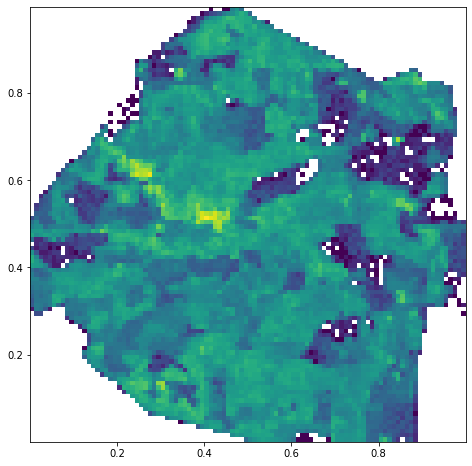

In [87]:
plt.figure(1, figsize=(8,8))
plt.hist2d(persons["XCoord"], persons["YCoord"], bins=100, norm=matplotlib.colors.LogNorm())
plt.gca().set_aspect("equal")

In [ ]:
# all adjustable parameters and default values
cfg = {
    "population.coarsemap.subdivx":20,
    "population.coarsemap.subdivy":20, # specifies the grid within which your potential parters will be found
    "aidsstage.start":1.25, # aids stage starts 15 months before death
    "aidsstage.final":0.5, # final aids stage starts 6 months before death
    "birth.boygirlratio": 0.497512437810945, # 1.0/2.01, when someone is born, a random number btn 0-1 is chosen and if its below this threshold, newborn is male otherwise girl
    'birth.pregnancyduration.dist.type': 'fixed',
    'birth.pregnancyduration.dist.fixed.value': 0.734246575342466, # 268/365 (roughly 9 months)
    'chronicstage.acutestagetime':0.25, # Duration of the acute stage. 3 months = 3/12
    'conception.alpha_base': -3, # 
    'conception.alpha_ageman': 0, #
    'conception.alpha_agewoman': 0, #
    'conception.alpha_wsf': 0, #
    'conception.beta': 0, #
    'conception.t_max': 200, # 
    'conception.wsf.dist.type':'fixed',
    'conception.wsf.dist.fixed.value': 0,
    'debut.debutage': 15, 
    # These are the parameters for the hazard in the diagnosis event
    'diagnosis.baseline': 0,
    'diagnosis.agefactor': 0,
    'diagnosis.genderfactor': 0,
    'diagnosis.diagpartnersfactor': 0,
    'diagnosis.isdiagnosedfactor': 0,
    'diagnosis.beta': 0,
    'diagnosis.HSV2factor': 0,
    'diagnosis.t_max': 200,
    # These are the parameters for the hazard in the dissolution event.
    'dissolutionmsm.alpha_0': 0.1,
    'dissolutionmsm.alpha_12': 0,
    'dissolutionmsm.alpha_3': 0,
    'dissolutionmsm.alpha_4': 0,
    'dissolutionmsm.alpha_5': 0,
    'dissolutionmsm.beta': 0,
    'dissolutionmsm.t_max': 200,
    'dropout.interval.dist.type': 'uniform',
    'dropout.interval.dist.uniform.min': 0.25,
    'dropout.interval.dist.uniform.max': 10,
    'formationmsm.hazard.type': 'agegap',
    # These are the parameters for the hazard in the 'agegap' formation event for msm.
    'formationmsm.hazard.agegap.baseline': 0.1,
    'formationmsm.hazard.agegap.numrel_sum': 0,
    'formationmsm.hazard.agegap.numrel_diff': 0,
    'formationmsm.hazard.agegap.meanage': 0,
    'formationmsm.hazard.agegap.eagerness_sum': 0,
    'formationmsm.hazard.agegap.eagerness_diff': 0,
    'formationmsm.hazard.agegap.gap_factor': 0,
    'formationmsm.hazard.agegap.gap_agescale': 0,
    'formationmsm.hazard.agegap.distance': 0,
    'formationmsm.hazard.agegap.beta' : 0,
    'formationmsm.hazard.agegap.t_max' :200,
    'formation.hazard.type':'agegap',
    # These are the parameters for the hazard in the 'agegap' formation event.
    'formation.hazard.agegap.baseline': 0.1,
    'formation.hazard.agegap.numrel_man': 0,
    'formation.hazard.agegap.numrel_woman': 0,
    'formation.hazard.agegap.numrel_diff': 0,
    'formation.hazard.agegap.meanage': 0,
    'formation.hazard.agegap.eagerness_sum': 0,
    'formation.hazard.agegap.eagerness_diff': 0,
    'formation.hazard.agegap.gap_factor_man': 0,
    'formation.hazard.agegap.gap_agescale_man': 0,
    'formation.hazard.agegap.gap_factor_woman': 0,
    'formation.hazard.agegap.gap_agescale_woman': 0,
    'formation.hazard.agegap.distance': 0,
    'formation.hazard.agegap.beta': 0,
    'formation.hazard.agegap.t_max': 200,
    'hivseed.time': 0,
    'hivseed.type': 'fraction',
    'hivseed.age.min': 0,
    'hivseed.age.max': 1000,
    'hivseed.gender': 'any',
    'hivseed.fraction': 0.2,
    # The hazard of transmission parameters
    'hivtransmission.param.a': -1.3997,
    'hivtransmission.param.b': -12.022,
    'hivtransmission.param.c': 0.1649,
    'hivtransmission.param.d1': 0,
    'hivtransmission.param.d2': 0,
    'hivtransmission.param.e1': 0,
    'hivtransmission.param.e2': 0,
    'hivtransmission.param.f1': 0,
    'hivtransmission.param.f2': 0,
    'hivtransmission.param.g1': 0,
    'hivtransmission.param.g2': 0,
    'hivtransmission.maxageref.diff': 1,
    'hsv2seed.time': -1,
    'hsv2seed.type': 'fraction',
    'hsv2seed.age.min': 0,
    'hsv2seed.age.max': 1000,
    'hsv2seed.gender': 'any',
    'hsv2seed.fraction': 0.2,
    'hsv2transmission.hazard.b': 0,
    'hsv2transmission.hazard.c': 0,
    'hsv2transmission.hazard.d': 0,
    'hsv2transmission.hazard.e1': 0,
    'hsv2transmission.hazard.e2': 0,
    'hsv2transmission.hazard.t_max': 200,
    'intervention.enabled': 'no',
    'monitoring.cd4.threshold': 350,
    'monitoring.fraction.log_viralload': 0.7,
    'monitoring.interval.piecewise.cd4s': [200,350],
    'monitoring.interval.piecewise.times': [0.25,0.25],
    'monitoring.interval.piecewise.left': 0.16666,
    'monitoring.interval.piecewise.right': 0.5,
    'mortality.aids.survtime.C':1325,
    'mortality.aids.survtime.k':-0.49,
    'mortality.normal.weibull.shape': 4,
    'mortality.normal.weibull.scale': 70,
    'mortality.normal.weibull.genderdiff': 5,
    'periodiclogging.interval': -1,
    'periodiclogging.starttime': -1,
    'periodiclogging.outfile.logperiodic': '${SIMPACT_OUTPUT_PREFIX}periodiclog.csv',
    'relocation.enabled': 'no',
    'syncpopstats.interval': -1,
    'syncrefyear.interval':-1,
    'logsystem.outfile.logevents': '${SIMPACT_OUTPUT_PREFIX}eventlog.csv',
    'logsystem.outfile.logpersons': '${SIMPACT_OUTPUT_PREFIX}personlog.csv',
    'logsystem.outfile.logrelations': '${SIMPACT_OUTPUT_PREFIX}relationlog.csv',
    'logsystem.outfile.logtreatments': '${SIMPACT_OUTPUT_PREFIX}treatmentlog.csv',
    'logsystem.outfile.logsettings': '${SIMPACT_OUTPUT_PREFIX}settingslog.csv',
    'logsystem.outfile.loglocation': '${SIMPACT_OUTPUT_PREFIX}locationlog.csv',
    'logsystem.outfile.logviralloadhiv': '${SIMPACT_OUTPUT_PREFIX}hivviralloadlog.csv',
    'person.art.accept.threshold.dist.type': 'fixed',
    'person.agegap.man.msm.dist.type': 'fixed',
    'person.agegap.man.msm.dist.fixed.value': 0,
    'person.agegap.man.dist.type':'fixed',
    'person.agegap.man.dist.fixed.value': 0,
    'person.agegap.woman.wsw.dist.type': 'fixed',
    'person.agegap.woman.wsw.dist.fixed.value': 0,
    'person.agegap.woman.dist.type': 'fixed',
    'person.agegap.woman.dist.fixed.value': 0,
    'person.cd4.start.dist.type': 'uniform',
    'person.cd4.end.dist.type': 'uniform',
    'person.cd4.start.dist.uniform.min':700,
    'person.cd4.start.dist.uniform.max':1300,
    'person.cd4.end.dist.uniform.min':0,
    'person.cd4.end.dist.uniform.max':100,
    'person.eagerness.man.dist.type':'fixed',
    'person.eagerness.man.msm.dist.type': 'fixed',
    'person.eagerness.man.msm.dist.fixed.value': 0,
    'person.eagerness.man.dist.fixed.value': 0,
    'person.eagerness.man.type': 'independent',
    'person.eagerness.woman.type': 'independent',
    'person.eagerness.woman.dist.type': 'fixed',
    'person.eagerness.woman.wsw.dist.type': 'fixed',
    'person.eagerness.woman.wsw.dist.fixed.value': 0,
    'person.eagerness.woman.dist.fixed.value': 0,
    'person.geo.dist2d.type': 'discrete',
    'person.geo.dist2d.discrete.densfile': '${SIMPACT_DATA_DIR}SWZ15adjv4.tif',
    'person.geo.dist2d.discrete.maskfile': '',
    'person.geo.dist2d.discrete.xoffset': 0,
    'person.geo.dist2d.discrete.yoffset': 0,
    'person.geo.dist2d.discrete.width': 1,
    'person.geo.dist2d.discrete.height': 1,
    'person.geo.dist2d.discrete.flipy': 'yes',
    'person.geo.dist2d.discrete.floor': 'no',
    'person.hiv.b0.dist.type': 'fixed',
    'person.hiv.b1.dist.type': 'fixed',
    'person.hiv.b0.dist.fixed.value': 0,
    'person.hiv.b1.dist.fixed.value': 0,
    'person.hsv2.a.dist.type': 'fixed',
    'person.hsv2.b2.dist.type': 'fixed',
    'person.hsv2.a.dist.fixed.value': 0,
    'person.hsv2.b2.dist.fixed.value': 0,
    'person.survtime.logoffset.dist.type': 'fixed',
    'person.survtime.logoffset.dist.fixed.value': 0,
    'person.vsp.toacute.x': 10,
    'person.vsp.toaids.x': 7,
    'person.vsp.tofinalaids.x': 12,
    'person.vsp.maxvalue': 1000000000,
    'person.vsp.model.type':'logdist2d',
    'person.vsp.model.logdist2d.dist2d.type': 'binormalsymm',
    'person.vsp.model.logdist2d.usealternativeseeddist': 'no',
    'person.vsp.model.logdist2d.dist2d.binormalsymm.mean': 4,
    'person.vsp.model.logdist2d.dist2d.binormalsymm.sigma': 1,
    'person.vsp.model.logdist2d.dist2d.binormalsymm.rho': 0.33,
    'person.vsp.model.logdist2d.dist2d.binormalsymm.min': 1,
    'person.vsp.model.logdist2d.dist2d.binormalsymm.max': 8,
    'population.nummen': 600000,
    'population.numwomen': 600000,
    'population.simtime': 15,
    'population.maxevents': 1,
    'population.agedistfile': '${SIMPACT_DATA_DIR}sa_2003.csv',
    'population.msm': 'no',
    'population.eyecap.fraction': 1
}

In [12]:
20*4

0.3489583333333333

In [1]:
import numpy as np
import scipy.stats as ss
import elfi
import math
from elfi_simpact_calibration_model import simpact_model

In [2]:
simpact_model(hivtransmission_param_f1=[1.1,1.1],
            formation_hazard_agegapry_gap_agescale_man_woman=[0.25,0.25],
            person_agegap_man_woman_dist_normal_mu= [2,2],
            person_agegap_man_woman_dist_normal_sigma=[2.5,2.5],
            person_eagerness_man_woman_dist_gamma_a=[0.23,0.23],
            person_eagerness_man_woman_dist_gamma_b=[45,45],
            formation_hazard_agegapry_gap_factor_man_woman_exp= [-0.3,0.3],
            formation_hazard_agegapry_baseline= [4.5,5.5],
            formation_hazard_agegapry_numrel_man_woman=[-0.5,-0.5],
            dissolution_alpha_0 = [-0.52,-0.52],
            conception_alpha_base= [-2.7,-2.7],
            diagnosis_baseline_t0=[-2,-2],
            diagnosis_baseline_t1=[0.2,0.2],
            diagnosis_baseline_t2=[0.3,0.3],
            diagnosis_baseline_t3=[0.5,0.5],
            diagnosis_baseline_t4=[0,0],
            batch_size=2)

array([[1.01379   , 0.00835   , 0.00522   , 0.01408   , 0.1408    ,
        0.        , 0.        , 0.61538462, 0.88235294, 1.        ,
        0.        , 0.        ],
       [0.        , 0.00835   , 0.00522   , 0.01408   , 0.1408    ,
        0.        , 0.        , 0.61538462, 0.88235294, 0.        ,
        0.        , 0.        ]])

In [ ]:
import numpy as np
import scipy.stats as ss
import elfi
import math
from elfi_simpact_calibration_model import simpact_model

# The multiprocessing client allows you to easily use the cores available in your computer. 
elfi.set_client('multiprocessing')

# Observed summary statistics
observation = np.array([[1.011,
                         0.16,0.338, 
                         0.186, 0.408, 0.028, 0.083,
                         0.77, 0.98,
                         0.983,
                         0.48, 0.7
                        ]])

# Define the ELFI model
m = elfi.new_model()
hivtransmission_param_f1 = elfi.Prior(ss.uniform, 2, 4, model=m) 
formation_hazard_agegapry_gap_agescale_man_woman = elfi.Prior(ss.uniform, 0, 0.5, model=m) 
person_agegap_man_woman_dist_normal_mu = elfi.Prior(ss.uniform,-3, 3, model=m) 
person_agegap_man_woman_dist_normal_sigma = elfi.Prior(ss.uniform, 1, 5, model=m) 
person_eagerness_man_woman_dist_gamma_a = elfi.Prior(ss.uniform, 0, 1.5, model=m) 
person_eagerness_man_woman_dist_gamma_b = elfi.Prior(ss.uniform, 30, 60, model=m) 
formation_hazard_agegapry_gap_factor_man_woman_exp = elfi.Prior(ss.uniform, -1, 0, model=m) 
formation_hazard_agegapry_baseline = elfi.Prior(ss.uniform, 4.5, 6, model=m)
formation_hazard_agegapry_numrel_man_woman = elfi.Prior(ss.uniform, -1, 1, model=m) 
conception_alpha_base = elfi.Prior(ss.uniform, -2, 1, model=m) 
dissolution_alpha_0 = elfi.Prior(ss.uniform, -3, 1, model=m) 
diagnosis_baseline_t0 = elfi.Prior(ss.uniform, -7, 1, model=m) 
diagnosis_baseline_t1 = elfi.Prior(ss.uniform, 0, 4, model=m) 
diagnosis_baseline_t2 = elfi.Prior(ss.uniform, 0, 4, model=m) 
diagnosis_baseline_t3 = elfi.Prior(ss.uniform, 0, 4, model=m) 
diagnosis_baseline_t4 = elfi.Prior(ss.uniform, -2, 2, model=m) 

sim = elfi.Simulator(simpact_model, 
                    hivtransmission_param_f1,
                    formation_hazard_agegapry_gap_agescale_man_woman,
                    person_agegap_man_woman_dist_normal_mu,
                    person_agegap_man_woman_dist_normal_sigma,
                    person_eagerness_man_woman_dist_gamma_a,
                    person_eagerness_man_woman_dist_gamma_b,
                    formation_hazard_agegapry_gap_factor_man_woman_exp,
                    formation_hazard_agegapry_baseline,
                    formation_hazard_agegapry_numrel_man_woman,
                    conception_alpha_base,dissolution_alpha_0,
                    diagnosis_baseline_t0,
                    diagnosis_baseline_t1,
                    diagnosis_baseline_t2,
                    diagnosis_baseline_t3,
                    diagnosis_baseline_t4, 
                    observed=observation)

# Define the distance function
d = elfi.Distance('euclidean', sim)

arraypool = elfi.ArrayPool(['simtime', 'd'])

# Perform SMC ABC
smc = elfi.SMC(d, batch_size=4, seed=42, pool=arraypool)
schedule = [0.7, 0.2, 0.05]
%time result_smc = smc.sample(10, schedule)

print(result_smc)


In [1]:
import numpy as np
import scipy.stats as ss
import elfi
import math
import os

def simpact_model_(simtime, batch_size=1, random_state=None):
    import pysimpactcyan
    simpact = pysimpactcyan.PySimpactCyan()
    import psimapacthelper as psh
    

    results = []

    for i in range(batch_size):
        cfg = {
            "population.nummen": 200,
            "population.numwomen": 200,
            "population.simtime": 40,
            "syncrefyear.interval": 1,
            "periodiclogging.interval": 1,
            "periodiclogging.starttime": 0,
        }
        
        cfg["population.simtime"] = int(simtime[i])


        res = simpact.run(cfg, 
                          "data", 
                          quiet=True)
        
        datalist = psh.readthedata(res)

        # Population growth rate
        growthrate = math.exp(psh.pop_growth_calculator(datalist=datalist, timewindow=[20, 36]))
        results.append(growthrate)


    return np.array(results).reshape(-1, 1)

# Observed summary statistics
observation = np.array([[math.exp(0.015)]])

# Define the ELFI model
m = elfi.new_model()
simtime = elfi.Prior(ss.uniform, 40, 60, model=m)  
sim = elfi.Simulator(simpact_model_, simtime, observed=observation)

# Define the distance function
d = elfi.Distance('euclidean', sim)

# Perform Rejection ABC
# rej = elfi.Rejection(d, batch_size=10, seed=123)
# sample = rej.sample(10, quantile=0.01)

# pool = elfi.OutputPool(['simtime'])
arraypool = elfi.ArrayPool(['simtime', 'd'])

# Perform SMC ABC
smc = elfi.SMC(d, batch_size=10, seed=42,  pool=arraypool)
schedule = [0.7, 0.2, 0.05]
%time result_smc = smc.sample(5, schedule)

print(result_smc)


ABC-SMC Round 1 / 3
Progress [==================================================] 100.0% Complete
ABC-SMC Round 2 / 3
Progress [==================================================] 100.0% Complete
ABC-SMC Round 3 / 3
Progress [==================================================] 100.0% Complete
CPU times: user 2.08 s, sys: 379 ms, total: 2.46 s
Wall time: 1min 5s
Method: SMC
Number of samples: 5
Number of simulations: 30
Threshold: 0.0176
Parameter                Mean               2.5%              97.5%
simtime:               59.169             56.909             61.097




In [2]:
arraypool.flush()

import os
print('Files in', arraypool.path, 'are', os.listdir(arraypool.path))

Files in pools/arraypool_42 are ['d.npy', 'simtime.npy']
